# El Artista en Python Colab

Para comenzar a programar en Python traduciremos los programas que hemos construido durante las lecciones del artista del ["Curso acelerado de introducción a CS"](https://studio.code.org/s/20-hour) de code.org code.org a Python.

Necesitamos instalar la biblioteca de instrucciones del artista (mover..., girar..., etc.), que en Python Colab se llama "ColabTurtle". La instalamos ejecutando la siguiente línea, clicando 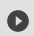:

In [1]:
!pip3 install ColabTurtle

Hemos instalado la biblioteca. La primera linea de la siguiente celda de código nos permite utilizar *todas* las instrucciones de esa biblioteca. La segunda línea nos permite usar la función `choice` de la biblioteca `random`.

In [2]:
from ColabTurtle.Turtle import *
from random import choice

En la clase pasada definimos la función `pizarra_vacía()` que inicializa la panrtalla de la forma que nosotros consideramos conveniente: 

In [3]:
def pizarra_vacia():
    initializeTurtle()
    bgcolor('white')
    color('black')
    right(90)

Como ya mencionamos una función debe comenzar con la palabra reservada `def`,  a continuación colocamos el nombre de la función (y sus argumentos) y finalizamos la línea con `:` (dos puntos). Las líneas siguientes si están identadas forman parte del *cuerpo* de la función y son las sentencias que se ejecutan cuando utilizamos la función. La definición de la función termina cuando termina el código o comenzamos una línea pegada al margen. 

Podemos definir, por ejemplo, una función para dibujar triángulos:

In [4]:
def dibujar_triangulo():
    for _ in range(3):
        forward(100)
        right(120)

Dentro de esta función utilizamos el ciclo `for` para dibujar los tres lados del triángulo. Esta función no tiene argumentos y simpre dibuja un triángulo equilátero de lados `100`.

In [5]:
pizarra_vacia() # inicializar pantalla
dibujar_triangulo()

# Otros ciclos

Además del ciclo `for`, que permite hacer un número determinado de repeticiones, ya vimos en code.org que en diferentes situaciones puede resultar natural diferentes maneras de repetición

*   ciclo `para` o `for`
*   ciclo `repetir hasta`
*   ciclo `repetir mientras`

en todos ellos, se suele llamar *cuerpo* a las instrucciones que siguen a cada ciclo y se repiten. Dentro del cuerpo muy frecuentemente pueden distinguirse instrucciones que son para el procesamiento propiamente dicho, y otras instrucciones que son preparatorias del siguiente procesamiento. Se recomienda que esas dos porciones de código sean nítidamente identificables.


Si bien ya hemos tenido ocasión de utilizar  ciclos `repetir hasta` y `repetir mientras` en el contexto de la programación con bloques de code.org, son ciclos de una complejidad mayor. Hemos notado que pueden dar lugar a programas cuya ejecución nunca termina.

Por ello, y por no resultar especialmente necesarios para resolver los ejercicios de "el artista", demoraremos un poco más su abordaje en Python.

Veamos, en cambio, el ciclo `para` o `for`.

## Ciclo para

Recordemos la solución al ejercicio 7 de la lección 11, "el artista 3" del  ["Curso acelerado de introducción a CS"](https://studio.code.org/s/20-hour) de code.org:
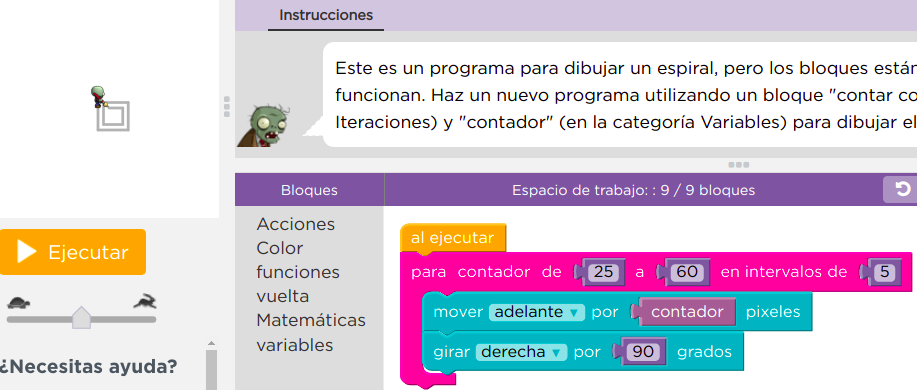

Para la traducción a Python, no alcanza con `for _ in range(8)` que nos permitiría repetir *exactamente* lo mismo 8 veces, ya que en esta solución no se repite exactamente lo mismo: en cada ejecución del *cuerpo* del ciclo se dibuja una línea de una longitud *diferente*.

Podemos realizar el dibujo del ejercicio con el siguiente programa:

In [6]:
# configuración pizarra inicial
pizarra_vacia()
speed(10)

# dibuja espiral
forward(25)
right(90)
forward(30)
right(90)
forward(35)
right(90)
forward(40)
right(90)
forward(45)
right(90)
forward(50)
right(90)
forward(55)
right(90)
forward(60)
right(90)

¿Es esta una forma conveniente de resolverlo?

Claramente no, ya que estamos escribiendo 8 veces casi el mismo trozo de programa:

```
forward(  )
right(90)
```

### Variables

Afortunadamente los lenguajes de programación nos permiten utilizar *variables*. Una variable sirve justamente para representar un valor que puede ser diferente en cada ejecución del código:

```
forward(longitud)
right(90)
```

En este ejemplo `longitud` es una variable.

Cada vez que se ejecuten estas dos instrucciones se dibujará una línea cuyo largo estará determinado por el valor de la variable `longitud` en ese momento, y luego girará 90 grados a la derecha.

La solución al ejercicio, consistiría en ejecutar esas dos instrucciones sucesivamente con los siguientes valores de la variable `longitud`: 25, 30, 35, 40, 45, 50, 55 y 60.

Existen diferentes maneras de escribir esto en Python utilizando el ciclo `for`. Una es:

In [7]:
# configuración pizarra inicial
pizarra_vacia()
speed(5)

# dibuja espiral
for longitud in [25, 30, 35, 40, 45, 50, 55, 60]:
    forward(longitud)
    right(90)

Aquí se hace una lista (veremos después profundamente las listas) con todos los valores que queremos que tome la variable y vamos recorriendo la lista.  

Otra forma de hacerlo:

In [8]:
# configuración pizarra inicial
pizarra_vacia()
speed(5)

# dibuja espiral
for longitud in range(25, 61, 5):
    forward(longitud)
    right(90)

Alternativamente:

In [9]:
# configuración pizarra inicial
pizarra_vacia()
speed(5)

# dibuja espiral
for contador in range(8):
    forward(25 + contador * 5 )
    right(90)

En la primera forma usamos argumentos de la función `range()` que nos permiten recorrer los mismos valores que cuando no usábamos el `for`. Después veremos mejor la función `range()` pero por ahora digamos  que


```
for longitud in range(25, 61, 5)
```
recorre todos los valores de 25 a 60 "saltando"  de a 5.

Podemos modificar los argumentos del range y se generarán otros dibujos.


In [10]:
# configuración pizarra inicial
pizarra_vacia()
speed(5)

# dibuja espiral
for longitud in range(20, 121, 5):
    forward(longitud)
    right(90)

### ¿Cuál de las dos soluciones es mejor?

Las dos son correctas.

La primera tiene a su favor:
*   la posibilidad de introducir valores que no estén exactamente separados por la misma diferencia (en este caso 5)
*   permite que los valores estén en cualquier orden
*   hace rápidamente visible cuáles son los valores posibles

Pero si la diferencia es siempre la misma, la segunda tiene ciertas ventajas:
*   informa automáticamente ese hecho
*   es fácil agregar y quitar valores (ver el siguiente ejemplo)
*   es la notación que más se parece a los ciclos `para` de otros lenguajes de programación (por ejemplo, del lenguaje de bloques de code.org)

Veamos que la segunda forma se puede generalizar fácilmente para construir espirales más grandes. 

In [11]:
# configuración pizarra inicial
pizarra_vacia()
speed(5)

# dibuja espiral
for longitud in range(25, 161, 5):
    forward(longitud)
    right(90)

La función `range()` es la misma que ya veníamos utilizando en `for _ in range(10)`, por ejemplo. Al evaluarse esta función se obtiene una secuencia de valores:

*   Al evaluarse `range(25, 61, 5)` se obtienen los valores 25, 30, 35, 40, 45, 50, 55 y 60
*   Al evaluarse `range(10)` se obtienen los valores 0, 1, 2, 3, 4, 5, 6, 7, 8 y 9.

La función `range()` puede recibir de 1 a 3 argumentos:

```
range(inicio, fin, paso)
```
Los argumento deben ser números enteros. 

Cuando solamente se proporcionan 2 valores a `range()`, se asume que son los de `inicio` y `fin` y `paso` es 1. Cuando solamente se proporciona 1 valor, se asume que es `fin`,  que `inicio` vale 0  y `paso` es 1.

Por ejemplo

In [12]:
range(10)

range(0, 10)

toma los valores de 0  a 9. Si transformamos en una lista a `range(10)` podemos ver los elementos comprendidos.

In [13]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
list(range(25, 61, 5))

[25, 30, 35, 40, 45, 50, 55, 60]

Se recomienda jugar con distintos ejemplos, para entender mejor el resultado de la función `range()`. Para visualizar los valores de la secuencia obtenida por la función `range()`, utilizar `list()` que lista sus elementos:

In [15]:
print(list(range(10)))
print(list(range(1,10)))
print(list(range(25, 65, 5)))
print(list(range(0)))
print(list(range(-5)))
print(list(range(7,-5,-1)))
# print(list(range( , 5))) # descomentar al princiio devuelve error
# print(list(range(10.0))) # descomentar al princiio devuelve error

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[25, 30, 35, 40, 45, 50, 55, 60]
[]
[]
[7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4]


Resumiendo, la solución que preferimos al ejercicio del espiral es

In [16]:
# configuración pizarra inicial
pizarra_vacia()
speed(5)

# dibuja espiral
for longitud in range(25, 61, 5):
    forward(longitud)
    right(90)

donde `longitud` es una variable, a la que llamamos *índice* del ciclo for, y las líneas 7 y 8 conforman el *cuerpo* del ciclo for.



### Comentarios sobre las variables:

*   Representan valores que pueden ser diferentes cada vez que se ejecuta la porción de código donde aparece
*   Permite nombrar un elemento, por ejemplo, llamarle `longitud` al valor, esto aporta legibilidad
*   Durante la ejecución del programa, se les destina un espacio en la memoria
*   Convención (Python): los nombres de las variables van en minúscula, puede ser una letra, una palabra, o más de una palabra separadas por guión bajo (por ejemplo: `longitud_lado`). Agrego: evitar nombres extremadamente largos o extremadamente cortos o incomprensibles (mejor `longitud_lado` que `lgtdld`). Nunca llamar `l` (la letra ele) o `O` (la letra o mayúscula) a una variable.

### Comentarios adicionales sobre las variables que se usan como índice del `for`:

*   Es común usar nombres muy cortos (`i`, `j`, `x` ...) aunque siempre es recomendable usar nombres "informativos"
*   No es recomendable que la variable que se usa como índice del `for` se utilice fuera del cuerpo del `for`, aunque Python lo permite
*   El nombre de la variable se puede cambiar, siempre que se cambie en la línea del `for` y en todos los lugares donde aparezca en el cuerpo del `for`
*   Cuando la variable no aparece en el cuerpo del `for` se trata de un `repetir n veces`, se recomienda reemplazar por guión bajo `_`.

In [17]:
for i  in range(100):
    print(i, end = ', ')

print('')

for i  in range(100):
    i = i**2
    print(i, end = ', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 
0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801, 

### Función `dibujar_cuadrado`

Vamos a definir ahora una función con un argumento,  específicamente la función `dibujar_cuadrado()` que toma un argumento y dibuja un cuadrado cuyos lados tienen la longitud dada por el argumento. 

In [18]:
def dibujar_cuadrado(longitud_lado):
    for _ in range(4):
        forward(longitud_lado)
        right(90)

Entonces podemos hacer

In [19]:
pizarra_vacia()
dibujar_cuadrado(50)

y

In [20]:
pizarra_vacia()
dibujar_cuadrado(100)

## Otro ejemplo con ciclo `for`




Recordemos la solución al ejercicio 6 de la lección 11, "el artista 3" del  ["Curso acelerado de introducción a CS"](https://studio.code.org/s/20-hour) de code.org:

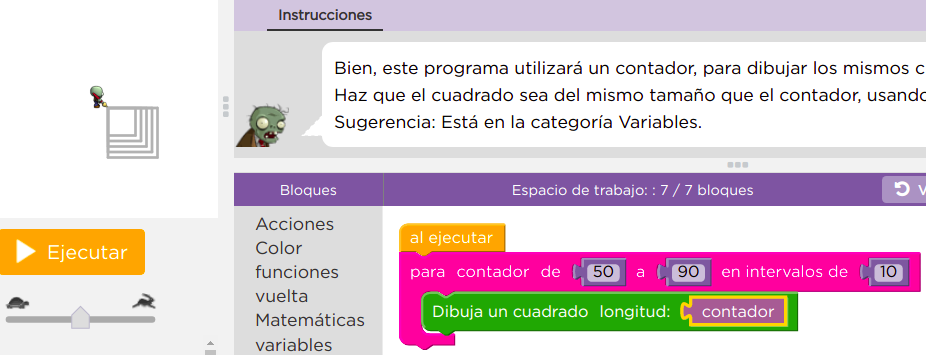

Nuevamente, para la traducción a Python, no alcanza con `for _ in range(5)` que nos permitiría repetir *exactamente* lo mismo 5 veces, ya que en esta solución no se repite exactamente lo mismo: en cada ejecución del cuerpo del ciclo se dibuja un cuadrado de una longitud diferente.

Si, así como disponemos, gracias a la biblioteca `ColabTurtle`, de funciones `forward()`, `right()`, etc., dispusiéramos de una función `dibujar_cuadrado()`, que dibuje un cuadrado conociendo la longitud de uno de sus lados podríamos realizar el dibujo del ejercicio con el siguiente programa:

In [21]:
# configuración pizarra inicial
pizarra_vacia()

# dibuja túnel
speed(10)
dibujar_cuadrado(50)
dibujar_cuadrado(60)
dibujar_cuadrado(70)
dibujar_cuadrado(80)
dibujar_cuadrado(90)

In [22]:
# configuración pizarra inicial
pizarra_vacia()

# dibuja túnel
forward(50)
right(90)
forward(50)
right(90)
forward(50)
right(90)
forward(50)
right(90)
forward(60)
right(90)
forward(60)
right(90)
forward(60)
right(90)
forward(60)
right(90)
forward(70)
right(90)
forward(70)
right(90)
forward(70)
right(90)
forward(70)
right(90)
forward(80)
right(90)
forward(80)
right(90)
forward(80)
right(90)
forward(80)
right(90)
forward(90)
right(90)
forward(90)
right(90)
forward(90)
right(90)
forward(90)
right(90)


Nuevamente podemos valernos del ciclo `for` para evitar la repetición de código:

In [23]:
# configuración pizarra inicial
pizarra_vacia()

def dibujar_cuadrado(longitud_lado):
    for _ in range(4):
        forward(longitud_lado)
        right(90)
        
# dibuja túnel
speed(10)
for longitud in range(50, 91, 10):
    dibujar_cuadrado(longitud)

Nuevamente, agregar unos cuadrados más es muy sencillo:

In [24]:
# configuración pizarra inicial
pizarra_vacia()

# dibuja túnel
speed(10)
for longitud in range(50, 151, 10):
    dibujar_cuadrado(longitud)

## Definición de funciones

Ya hemos hablado un poco de funciones y como definirlas,  ahora profundizaremos un poco más sobre el tema.

Recordemos que podemos dibujar un cuadrado de lado 50  utilizando el siguiente código:

In [25]:
# configuración pizarra inicial
initializeTurtle()
bgcolor('white')
color('black')
right(90)

# dibuja cuadrado
for _ in range(4):
    forward(50)
    right(90)

Estas líneas están bien y el programa hace lo que nosotros queremos. Sin embargo,  si queremos usar repetidamente la pizarra o si queremos dibujar muchos cuadrado en una pizarra, convendrá modularizar un poco. Para ello, más arriba hemos definido dos funciones:

In [26]:
def pizarra_vacia():
    initializeTurtle()
    bgcolor('white')
    color('black')
    right(90)

def dibujar_cuadrado(longitud_lado):
    for _ in range(4):
        forward(longitud_lado)
        right(90)

La primera función no tiene argumentos e inicializa la pantalla, la segunda función dibuja un cuadrado cuyos lados tiene longitud `longitud_lado`. 

En la definición de `dibujar_cuadrado()` la expresión `longitud_lado` es una variable. Cuando escribimos la definición de la función `dibujar_cuadrado`, desconocemos el valor de la variable. Su valor recién se conocerá cuando se utilice la función.

Esta variable se llama *parámetro* de la función `dibujar_cuadrado`.

Con estas definiciones podemos reproducir lo que programamos dos celdas de código más arriba escribiendo:

In [27]:
pizarra_vacia()
dibujar_cuadrado(50)


### Comentarios sobre las funciones:

*   Todos los lenguajes de programación modernos permiten definir funciones.
*   Esto contribuye a generalizar y dar nombres a porciones de código, facilitando su reutilización.
*   Realizan abstracciones que aportan legibilidad.
*   Se deben definir funciones cuando se identifican *porciones de código que tienen sentido.*
*   Convención (Python): los nombres de las funciones van en minúscula, puede ser una palabra, o más de una palabra separadas por guión bajo (por ejemplo: `dibujar_cuadrado`).

Las funciones pueden tener 0, 1, 2 ó más parámetros. Incluso pueden tener un número indeterminado de parámetros.

Un ejemplo de función sin parámetros es `pizarra_vacía()`. A veces se dicen, quizás lo escucharán en algunos ámbitos, que una función sin parámetros es un *procedimiento*. 

Un ejemplo de función con 1 parámetro es `dibujar_cuadrado()`.

En  ejemplos anteriores hemos aumentado o cambiado la velocidad de la tortuga por comodidad. Podemos mejorar la definición de la función `pizarra_vacia()` agregando un parámetro que indique la velocidad. 

In [28]:
def pizarra_vacia(velocidad = 5):
    initializeTurtle()
    bgcolor('white')
    color('black')
    speed(velocidad)
    right(90)

Esta función tiene una parámetro *optativo*, el parámetro `velocidad`. Cuando le damos un valor al parámetro entonces esa será la velocidad de la tortuga. En  cambio, si no le damos un valor, la velocidad será 5,  el *valor por defecto*. Eso quiere decir que cuando  invocamos

```
pizarra_vacia()
```

internamente la variable `velocidad` vale `5`. Mientras que si ejecutamos, por ejemplo, 

```
pizarra_vacia(12)
```
la velocidad de la tortuga será  `12`.




In [29]:
pizarra_vacia(10, 'green')

TypeError: pizarra_vacia() takes from 0 to 1 positional arguments but 2 were given

## Ejemplo: dibujar un triángulo arbitrario

Todos sabemos (creo) que el triángulo es una figura geométrica *rígida*,  es decir es indeformable. Está es una importante propiedad utilizada, por ejemplo, en algunos sistemas constructivos.  

La propiedad de ser indeformable es equivalente a la propiedad de que dados tres segmentos existe a lo más un único polígono de tres lados formado por esos segmentos. 

Más específicamente,  dadas tres medidas $a$, $b$, $c$ mayores que $0$ y tal que la suma de  cualesquiera dos de ellas es mayor que la tercera,  existe un único triángulo (salvo desplazamientos y rotaciones) con lados que tienen esas tres medidas.




¿Cómo construimos un triángulo con lados $a$, $b$, $c$?

Debemos usar el teorema del coseno que es una generalización del teorema de Pitágoras.

**Teorema del coseno.** *Dado un triángulo cualquiera, siendo $\alpha$, $\beta$, $\gamma$ los ángulos, y $a$, $b$, $c$, los lados respectivamente opuestos a estos ángulos entonces:*
$$
c^{2}=a^{2}+b^{2}-2ab\cos \gamma.
$$  

Por lo tanto, podemos despejar los ángulos usando dos veces el teorema y el hecho de que la suma de los ángulos interiores de un triángulo es $180^º$.

\begin{align}
a^{2}&=b^{2}+c^{2}-2bc\cos \alpha,\\
b^{2}&=a^{2}+c^{2}-2ac\cos \beta. \\
\end{align}  
En consecuencia,
\begin{align}
\cos \alpha &= \frac{b^{2}+c^{2}- a^{2}}{2bc}, \\
\cos \beta &= \frac{a^{2}+c^{2}- b^{2}}{2ac}.\\
\end{align} 
Por consiguiente, 
\begin{align}
\alpha &= \arccos\left(\frac{b^{2}+c^{2}- a^{2}}{2ab}\right), \tag{1}\\
\beta &= \arccos\left(\frac{a^{2}+c^{2}- b^{2}}{2ac}\right),\tag{2}\\
\gamma &= 180 - \alpha- \beta.\tag{3}
\end{align} 


Intentemos ahora usando las fómulas (1), (2) y (3) dibujar un triángulo de lados $a$, $b$, $c$. Debemos tener en cuenta las siguientes consideraciones

- Python no tiene en forma nativa la función $\arccos(\theta)$ y  debemos importar el módulo `math` para adquirirla.
- Las funciones trigonométricas del módulo `math` tienen como argumentos ángulos en *radianes*. no en grados sexagesimales.

Esto último no influye demasiado en las fórmulas. En realidad (1) y (2) quedan iguales y solo debemos tener cuadado con la fórmula (3) que pasaría a ser 
$$
\gamma = \pi - \alpha- \beta.\tag{3'}
$$

Lo más importante de la segunda observación es que como `turtle` maneja solo grados sexagesimales necesitamos funciones para convertir grados a radianes y radianes a grados.

Comencemos,  y lo primero que debemos hacer es importar el módulo `math` y lo haremos de la siguiente manera:

In [ ]:
from math import *

Esta forma de importar `math` permite traer todas las funciones y usarlas en forma sencilla. También importa algunas constantes importantes, como, por ejemplo, el valor aproximado de $\pi$.

In [ ]:
print(pi)
print(cos(pi)) # debería dar -1
print(sin(pi)) # debería dar 0
print(cos(pi/4)) # aproximadamente raíz de 2 sobre 2
print(acos(-1)) # pi. arcocoseno es la función acos() de Python math
print(acos(0)) # pi/2 
print(acos(1)) # 0.0

3.141592653589793
-1.0
1.2246467991473532e-16
0.7071067811865476
3.141592653589793
1.5707963267948966
0.0


Veamos ahora las funciones para convertir grados a radianes y radianes a grados. Son muy sencillas:

In [ ]:
def grad_a_rad(angulo_g):
    return angulo_g * pi / 180

def rad_a_grad(angulo_r):   
    return angulo_r * 180 / pi 

Recordemos que el `return` indica que la función devuelve un valor. En el caso  de la función  `grad_a_rad()` recibe el valor de un ángulo en radianes, lo convierte a grados y lo devuelve. Ese valor que devuelve puede ser asignado a una variable que luego podrá ser utilizada. Por ejemplo,

In [ ]:
ang_1 = rad_a_grad(pi)
ang_2 = rad_a_grad(pi/4)

print(ang_1, ang_2)

180.0 45.0


Ya estamos en condiciones de definir  funciones que nos devuelvan los ángulos del triángulo. Podríamos definir tres funciones, pero será más sencillo hacer una función que devuelva tres valores: 

In [ ]:
def angulos_triangulo(a, b, c):
    # pre: a, b, c números tq a + b > c, a + c > b, b + c > a
    # post: devuelve los ángulos alfa, beta, gama del triángulo abc en radianes
    alfa = acos((b**2 + c**2 - a**2) / (2*b*c))
    beta = acos((a**2 + c**2 - b**2) / (2*a*c))
    gama = pi - alfa - beta
    return alfa, beta, gama

Ahora podemos definir la función para dibujar un triángulo  de lados $a$, $b$, $c$:

In [ ]:
def triangulo(a, b, c):
    # pre: a, b, c números a, b, c > 0 tq a + b > c, a + c > b, b + c > a
    # post: dibuja el triángulo abc
    alfa, beta, gama = angulos_triangulo(a, b, c) # ángulos del triángulo abc en radianes
    ang_a, ang_b, ang_c = rad_a_grad(alfa), rad_a_grad(beta), rad_a_grad(gama) #  ángulos en grado sexagesimales
    print(ang_a, ang_b,  ang_c)
    forward(a)
    right(180 - ang_c)
    forward(b)
    right(180 - ang_a)
    forward(c)
    right(180 - ang_b)



Observen que estamos usando funciones dentro de funciones y  el código lejos de ser "código spaghetti" está modularizado. 

Algunas funciones no las hemos utilizado, pero no importa, el objetivo es que el código sea lo más claro posible y también se busca que sea reutilizable y generalizable. 

Probemos dibujar triángulos:

In [ ]:
pizarra_vacia()
triangulo(150, 150, 150) # triángulo equilátero
hideturtle()

60.00000000000001 60.00000000000001 59.999999999999986


In [ ]:
pizarra_vacia()
triangulo(300, 200, 200) # triángulo isosceles
hideturtle()

97.18075578145829 41.40962210927086 41.40962210927085


In [ ]:
pizarra_vacia()
triangulo(230, 350, 150) # triángulo escaleno
hideturtle()

28.700394505681036 133.0478335924726 18.251771901846347


Por supuesto que podemos extender la función y dibujar triangulos en diferentes orientaciones, con diferentes colores, etc. Dejamos eso a ustedes por si quieren experimentar.  

Otra forma de dibujar,  más lenta pero interesante, es avanzando de a 1 y usar iteraciones. Para eso también modularizamos y definimos nuestra propia versión de la función `forward()` utilizando la instrucción `forward(1)`:

In [ ]:
def avanzar(pixeles):
    # pre: pixeles entero >= 0
    # post: avanza pixeles en la dirección actual
    for _ in range(pixeles):
        forward(1) 

Luego podemos definir otra función que dibuja triángulos:

In [ ]:
def triangulo_lento(a, b, c):
    # pre: a, b, c números tq a + b > c, a + c > b, b + c > a
    # post: dibuja el triángulo abc
    alfa, beta, gama = angulos_triangulo(a, b, c) # ángulos del triángulo abc en radianes
    ang_a, ang_b, ang_c = rad_a_grad(alfa), rad_a_grad(beta), rad_a_grad(gama) #  ángulos en grado sexagesimales
    print(ang_a, ang_b,  ang_c)
    avanzar(a)
    right(180 - ang_c)
    avanzar(b)
    right(180 - ang_a)
    avanzar(c)
    right(180 - ang_b)

Probemosla:

In [ ]:
pizarra_vacia(10) # la aceleramos un poco
triangulo_lento(230, 350, 150) # triángulo escaleno
hideturtle()

La función `getheading()` devuelve el ángulo hacia donde apunta la tortuga, la función `goto()` envía la tortuga a las coordenada especificadas. las funciones `getx()`, `gety()` devuelven las coordenadas $x$ e $y$, respectivamente, de la posición de la tortuga. Utilizando estas funciones resolver el siguiente ejercicio.

**Ejercicio.** Definir la función `avanzar()` sin usar `forward()` ni `forward(1)`. 

*Observación.* No es difícil, usando un poco de trigonometría, dibujar un segmento que parta de cierta posición y vaya en la dirección correcta. Primero deberías pensar en este problema. Un poco más complicado es darse cuenta de como dibujar el segmento con la longitud deseada.   

In [ ]:
def avanzar(pixeles):
    # pre: pixeles entero >= 0
    # post: avanza pixeles en la dirección actual
    pass  # reemplazar `pass` (que no hace nada) por líneas de código
    angulo = getheading()
    ang_rad = grad_a_rad(angulo)
    x0, y0 = getx(), gety() # coordenadas iniciales
    for x in range(int(pixeles * cos(ang_rad))):
        goto(x0 + x, y0 + x * tan(ang_rad)) 
    # La función colapsa si angulo es cercano a 90º.

pizarra_vacia(8) # la aceleramos un poco
face(45)
avanzar(100)
hideturtle()
